In [493]:
####################### DATA WRANGLING AND FEATURE ANALYSIS #####################################
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel('Data/neis-data-dictionary_terms.xlsx')
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(dict_df)
print(main_df.info())
print(main_df.describe())

         Variable name                               Variable description  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

        business_id   anzsic_code         metro      sv_month       sv_year  \
count  53646.000000  53596.000000  53646.000000  11147.000000  11147.000000   
mean   26827.169258   7423.195780      0.058308      6.606262   2012.755898   
std    15488.324811   2428.965571      0.234327      3.435323      1.818195   
min        1.000000    100.000000      0.000000      1.000000   2009.000000   
25%    13414.250000   5259.000000      0.000000      4.000000   2011.000000   
50%    26827.500000   7869.000000      0.000000      6.000000   2012.000000   
75%    40239.750000   9525.000000      0.000000     10.000000   2014.000000   
max    53654.000000   9901.000000      1.000000     12.000000   2017.000000   

       sv_hours_work  sv_staff_lt35h  sv_staff_gt35h  sv_end_train  \
count    8102.000000     5803.000000     5296.000000   3049.000000   
mean       35.280449        0.558849        0.405778      1.296491   
std        21.909007        2.007426        2.342488      0.598547   
min     

In [494]:
# Analyse the information in columns and study the data in it
dict_df.columns = ['var_name','var_descr','var_coding','var_categ','notes']
print(main_df.head())
print(dict_df.head())

   business_id start_date   end_date neis_type  \
0            1 2013-09-26 2014-09-24      NEI4   
1            2 2014-06-05 2015-06-03      NEI4   
2            3 2015-04-09 2016-01-17      NEI4   
3            4 2009-12-24 2010-12-22      NEI4   
4            5 2015-09-10 2016-09-07      NEI5   

                              exit_reason successful  anzsic_code  \
0                  Completed Successfully          Y       7112.0   
1                  Completed Successfully          Y       9529.0   
2  Business not Operating According to BP          N       7866.0   
3                  Completed Successfully          Y       6644.0   
4                  Completed Successfully          Y       7865.0   

           industry_type state  metro      ...       sv_end_mentor  \
0          communication    SA      0      ...                 NaN   
1     personal_and_other   VIC      0      ...                 NaN   
2  property_and_business   NSW      0      ...                 NaN   
3   

age_group                                   15_19  20_24  25_29  30_34  35_39  \
industry_type                   successful                                      
accommodation_cafes_restaurants N               1     15     26     26     32   
                                Y               4     19     68     79     60   
agriculture_forestry_fishing    N               3     12     40     24     28   
                                Y               1     14     52     65     80   
communication                   N               1      7     21     19     15   
                                Y               0      7     18     33     17   
construction                    N               4     43    104     96    143   
                                Y               8     79    197    294    316   
cultural_and_recreational       N               7    175    392    300    240   
                                Y               7    438   1039    853    645   
education                   

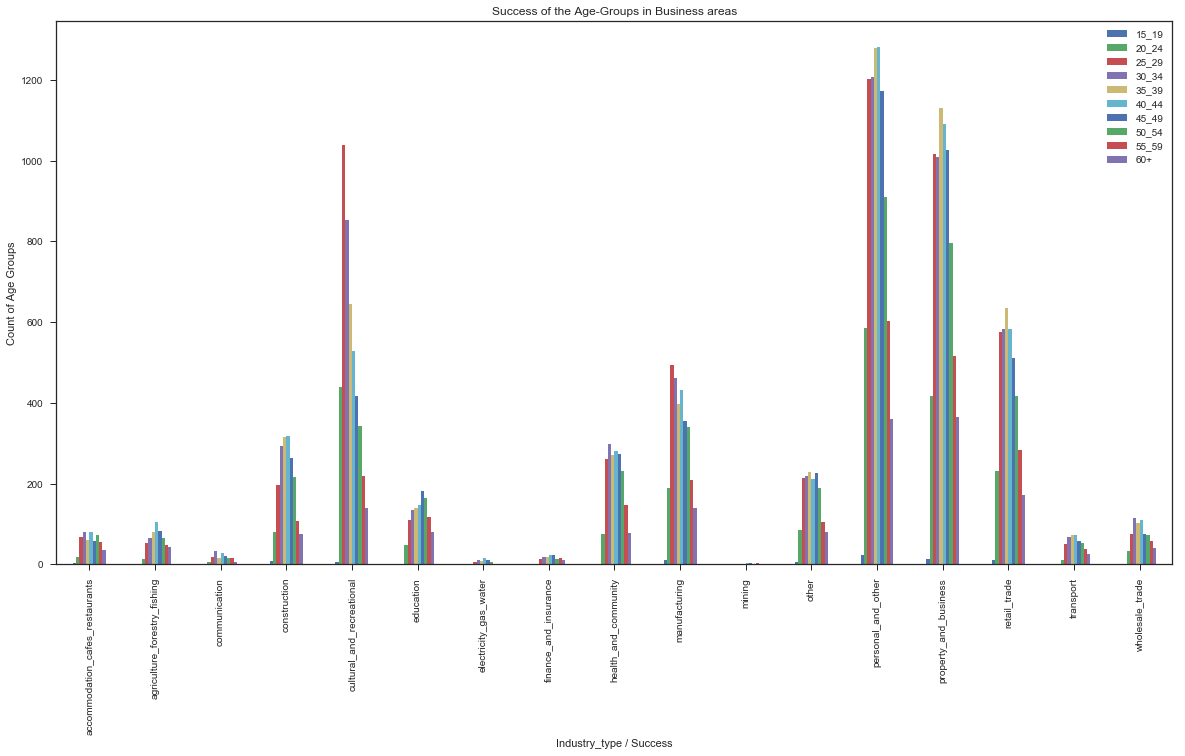

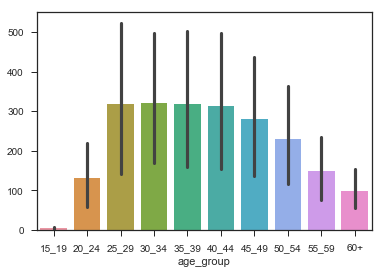

In [495]:
# prepare a pivot table to display the number of successes/failure businesses among different age groups
main_df['Age'] = main_df['age_group']
main_pivot1 = main_df.pivot_table(values='Age', index=['industry_type','successful'], columns='age_group', aggfunc='count',fill_value=0, dropna = True, margins_name='All')
print(main_pivot1)

# The above pivot table couln't be used directly to analyse as to which age group has high success rate.
# Therefore creating another pivot and using it for Barchart
main_pivot2 = main_df[main_df['successful']=='Y'].pivot_table(values='Age', index=['industry_type'], columns='age_group', aggfunc='count',fill_value=0, dropna = True, margins_name='All')
main_pivot2.plot.bar(rot=90,figsize=(20,10)).legend(loc='upper right')
plt.xlabel('Industry_type / Success')
plt.ylabel('Count of Age Groups')
plt.title('Success of the Age-Groups in Business areas')
plt.show()

sns.barplot(data=main_pivot2);

On analysing the above Bar charts () and pivot table, we could understand that:
    1) Age groups between 25 to 45 are very successfull than those of other age groups
    2) The above age groups are very successfull in the industry types 'Property_and_business' and 'personal_and_other'
    3) All the age groups were least or not so successfull in industry types 'mining'

                                           State                            \
StateVal                                     ACT   NSW  NT   QLD   SA  TAS   
industry_type                   successful                                   
accommodation_cafes_restaurants N              3   101   0    42   18   14   
                                Y              4   174   1    75   56   33   
agriculture_forestry_fishing    N              0    82   0    51   11    6   
                                Y              3   202   2   109   40   24   
communication                   N              0    43   0    19    7    0   
                                Y              1    54   0    38   14    1   
construction                    N              8   207   2   159   34   24   
                                Y             15   500   7   408  121   58   
cultural_and_recreational       N             28   616   3   326  146   46   
                                Y             50  1447  17   829

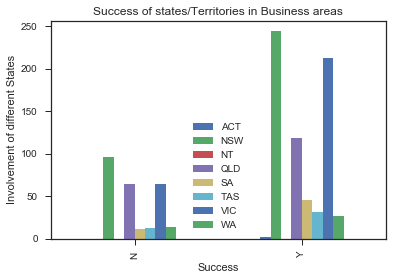

In [496]:
# prepare a pivot table to display the number of successes/failure businesses among different States
main_melt2 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['state'],var_name='State',value_name='StateVal')
# Replace N/A values with 0 in the columns of pivot table
main_pivot2 = main_melt2.pivot_table(values=None, index=['industry_type','successful'], columns='StateVal', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot2)
industries = main_pivot2.index.get_level_values(0).unique()
for industry in industries:
    split = main_pivot2.xs(industry)
    state = split["State"]

# plot a bar chart to check which States/Territories are getting involved in what businesses and how 
# successful they are..
state.plot(kind="bar").legend(loc='lower center')
plt.xlabel('Success')
plt.ylabel('Involvement of different States')
plt.title('Success of states/Territories in Business areas')
plt.show()

On analysing the above bar chart, we could find that:
    1) NSW, QLD and VIC have the most number of participants in this program.
    2) NSW appears to have a high success rate when compared to the other states.

                      industry_type  success_percent
0   accommodation_cafes_restaurants        68.992248
1      agriculture_forestry_fishing        71.465296
2                     communication        60.299625
3                      construction        73.195474
4         cultural_and_recreational        72.897638
5                         education        69.060773
6             electricity_gas_water        81.578947
7             finance_and_insurance        64.220183
8              health_and_community        70.685841
9                     manufacturing        68.053058
10                           mining        62.500000
11                            other        64.883914
12               personal_and_other        67.312046
13            property_and_business        67.781043
14                     retail_trade        65.367047
15                        transport        72.364217
16                  wholesale_trade        72.292994


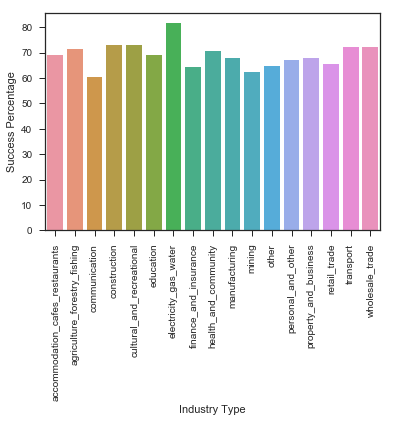

In [497]:
########################################################################################################
# Linear regression could not be conducted on "Industry type" as it is a categorical variable.
# Therefore, we are calculating the 'Success percent' per industry type and plotting a bar chart 
# to analyse the trends
########################################################################################################
def convert_success(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 0
    else: return 0

main_df["success_indicator"] = main_df["successful"].apply(convert_success)
# Calculate the "success percent per industry type"
industry_df = main_df.groupby(['industry_type'])['success_indicator'].agg(
                             [('success_percent', lambda success_indicator: 100* ((success_indicator > 0).sum()) / len(success_indicator))])
industry_df.reset_index(inplace=True)
print(industry_df.head(20))

sns.barplot(x="industry_type", y="success_percent", data=industry_df);
plt.xticks(rotation=90)
# Label axes
plt.ylabel('Success Percentage')
plt.xlabel('Industry Type')       
plt.show()

As per the Bar Chart shown above, we can make the following assumptions:
    1) Only one industry "Electricity, gas and water" stands out in success rate among all of the industry types.
    Only this indusry type has a success percentage of more than 80%
    
    2) Among the industry types, only the communication industry has the lowest "Success Percentage" of 60%
    
    3) There are 6 industry_types that have a succes rate ranging between 70% and 80%
    
Industry type could be an important indicator while screening candidates wishing to participate in this program. 
According to the above stats, we could give a score/rate the participants that apply for NEIS program. Note that 
this score will be summed up with other such ratings to arrive at a final score. This final score could be used
for 1) Accepting / Rejecting the applicant 2) Identifying the areas where more funding needs to be allocated etc.

--> Industry type >= 80% will be given a score of 1

--> Industry type >= 75% and < 80% will be given a score of 0.9

--> Industry type >= 70% and < 75% will be given a score of 0.8

--> Industry type >= 65% and < 70% will be given a score of 0.7

--> Industry type >= 60% and < 65% will be given a score of 0.6

--> Industry type >= 50% and < 60% will be given a score of 0.5

--> All Industry types with less than 50% success rate are not encouraged and will be given a score of 0

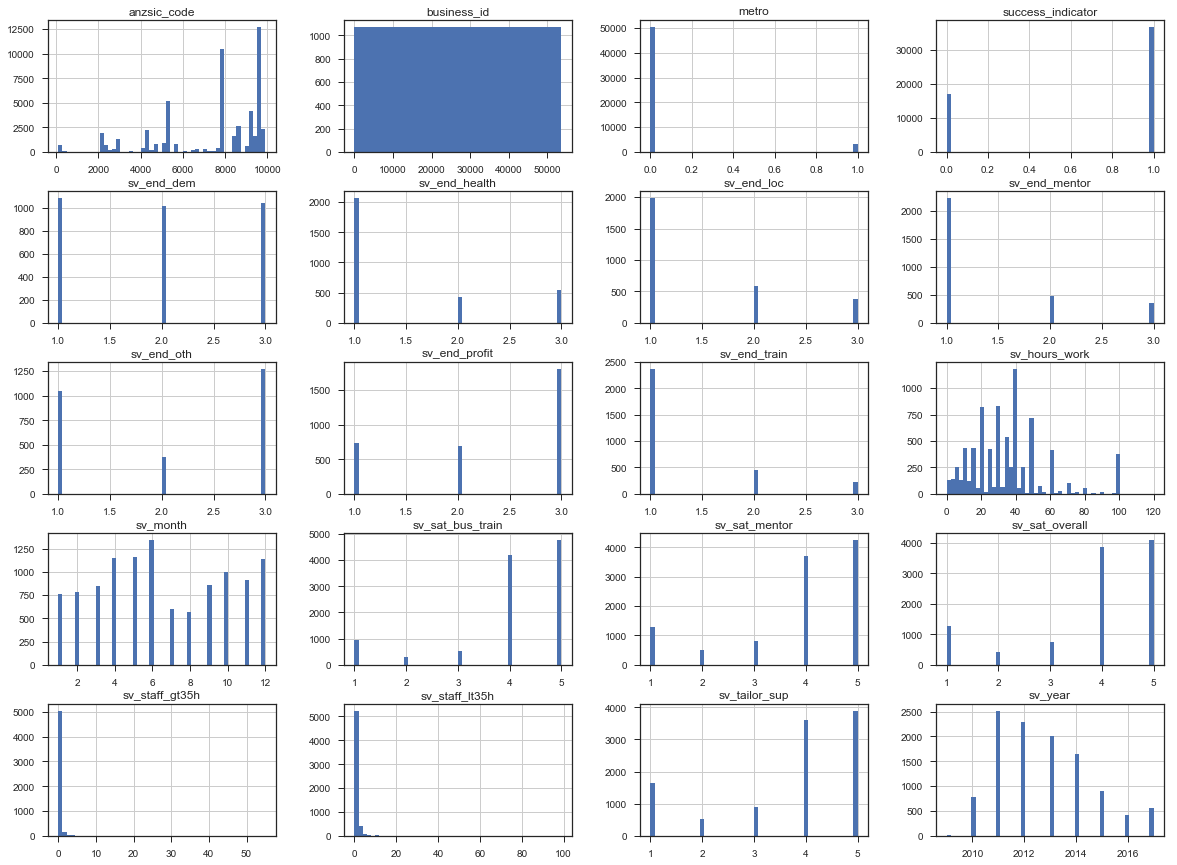

In [498]:
# Analyse and compare the histograms of other 
%matplotlib inline
import matplotlib.pyplot as plt
main_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

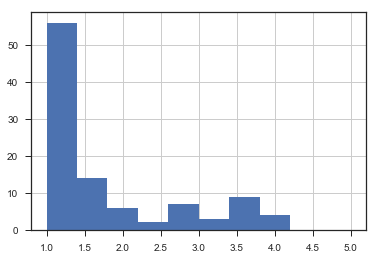

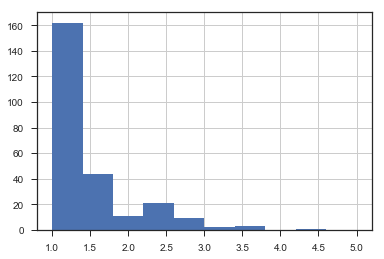

In [499]:
# Converting the 2 features "Staff working > 35 hrs" and "Staff working < 35 hrs" to log scale as they appear a bit
# skewed.
main_log = main_df [['sv_staff_gt35h','sv_staff_lt35h']]
main_log["sv_staff_gt35h"].apply(np.log).hist(range={1,5})
plt.show()

main_log["sv_staff_lt35h"].apply(np.log).hist(range={1,5})
plt.show()

 Above histograms indicate that most of the particiants have very less employees working for more than 35 hours 
 and less than 35 hours. i.e. Most of these businesses have the owner as the employee along with a mentor assigned
 by the department.

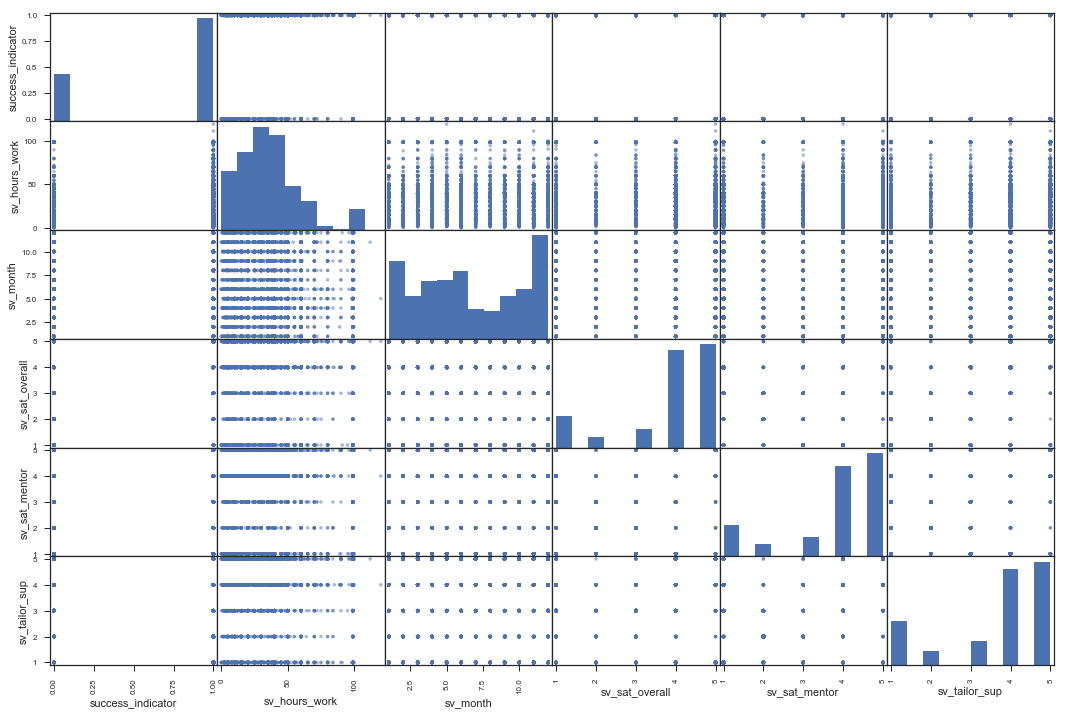

In [388]:
# There is a nice variation in some of the features such as "SV_HOURS_WORK", "SV_MONTH" and "SV_SAT_OVERALL"
# Separating these features and plotting a scatter matrix to analyse further
from pandas.plotting import scatter_matrix

attributes = ["success_indicator","sv_hours_work", "sv_month", "sv_sat_overall","sv_sat_mentor","sv_tailor_sup"]
scatter_matrix(main_df[attributes], figsize=(18, 12))
plt.savefig('matrix.png')


As per the above scatter matrix, we make deduce that Businesses working for 50-100 hours / week tend to be succesfull 
(although there are few failures.)

In [500]:
# Representing the gender as NUMBERS i.e. Male: 1 and Female: 0
def convert_gender(x):
    if "M" in x:
        return 1
    elif "F" in x:
        return 0
    else: return 0
    
# Representing the Success_indicators as NUMBERS i.e. SUCCESS - Y: 1 and SUCCESS - N (Failure): 0    
def convert_successful(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 1
    else: return 0    

# Some of the columns store text/ Business IDs and they dont make much sense. Therefore, consider numerical columns.
main_model = main_df[['state','metro','age_group','gender_cd','industry_type',
                      'sv_hours_work','sv_month','sv_sat_bus_train',
                      'sv_sat_mentor','sv_sat_overall','neis_allowance_ind','successful']]

# Some of the features in the above dataframe above text/ descriptions and these can be converted to numerical equivalents.
# for Instance, in "gender_cd", male can be represented as 1 and female can be represented as 0   
main_model["success_indicator"] = main_model["successful"].apply(convert_successful)
main_model["neis_allowance_ind"] = main_model["neis_allowance_ind"].apply(convert_gender) # function for "gender" can be applied here
main_model["gender_cd"] = main_model["gender_cd"].apply(convert_gender)

main_model.describe()

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,metro,gender_cd,sv_hours_work,sv_month,sv_sat_bus_train,sv_sat_mentor,sv_sat_overall,neis_allowance_ind,success_indicator
count,53646.000000,53646.000000,8102.000000,11147.000000,10700.000000,10593.000000,10408.000000,53646.0,53646.0
mean,0.058308,0.516143,35.280449,6.606262,4.081682,3.864628,3.877786,0.0,1.0
std,0.234327,0.499744,21.909007,3.435323,1.177991,1.325153,1.305337,0.0,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0
25%,0.000000,0.000000,20.000000,4.000000,4.000000,4.000000,4.000000,0.0,1.0
50%,0.000000,1.000000,35.000000,6.000000,4.000000,4.000000,4.000000,0.0,1.0
75%,0.000000,1.000000,45.000000,10.000000,5.000000,5.000000,5.000000,0.0,1.0
max,1.000000,1.000000,120.000000,12.000000,5.000000,5.000000,5.000000,0.0,1.0


In [501]:
# Finding the positive/negative correlation between the different features and the success indicators
corr_matrix = main_model.corr()
corr_matrix["success_indicator"].sort_values(ascending=False)

metro                NaN
gender_cd            NaN
sv_hours_work        NaN
sv_month             NaN
sv_sat_bus_train     NaN
sv_sat_mentor        NaN
sv_sat_overall       NaN
neis_allowance_ind   NaN
success_indicator    NaN
Name: success_indicator, dtype: float64

As per the Correlation results, only certain features are positively correlated such 
as "SV_SAT_OVERALL","SV_SAT_MENTOR", SC_SAT_BUS_TRAIN, SV_MONTH, SV_HOURS_WORK. 
All other features are either Close to ZERO/ Negatively correlated.
But none of the features appear to be very strongly correlated with the target "SUCCESS INDICATOR"

We haven't considered the different personality types as a feature. It is quite possible that this feature could 
have an influence on the TARGET variable apart from the Industry_type. Therefore, Lets see correlation 
of personality type with the "Success indicator" in the next section.

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  personality_type  success_percent
0     NO_DISABLITY        71.049547
1   disability_ind        64.601147
2  ex_offender_ind        60.255630
3     homeless_ind        69.379451
4   indigenous_ind        57.227891
5         nesb_ind        70.286686
6      refugee_ind        50.000000
7  sole_parent_ind        62.407302


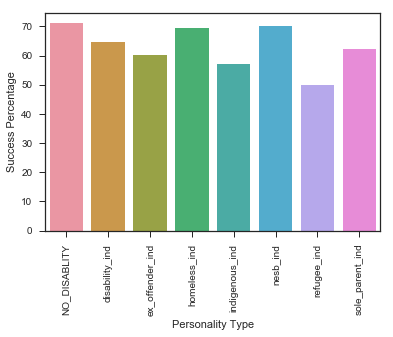

In [502]:
# Check whether the "personality type" has a positive correlation with "Success Indicator"

# Bring all the personality types as a single column in the Data frame.
def identify_personality(x):
    if x['indigenous_ind'] == 'Y':
        return "indigenous_ind"
    elif x['ex_offender_ind'] == 'Y':
        return "ex_offender_ind"
    elif "Y" in x['nesb_ind']:
        return "nesb_ind"
    elif x['refugee_ind'] == 'Y':
        return "refugee_ind"
    elif x['disability_ind'] == 'Y':
        return "disability_ind"
    elif x['homeless_ind'] == 'Y':
        return "homeless_ind"
    elif x['sole_parent_ind'] == 'Y':
        return "sole_parent_ind"
    else:
        return "NO_DISABLITY"


#we need to find the "Success percentage per community/personality type" and check whether this correlates
# with our target.
main_model['personality_type'] = main_df.apply(lambda row: identify_personality(row),axis=1)
main_model["success_indicator"] = main_df["successful"].apply(convert_success)

# Aggregate the count of "Successes/personality types"
#personality_df = main_model.groupby(['personality_type','successful'], as_index=False).agg({"success_indicator": "sum"})

# Calculate the "success percent per industry type"
personality_df = main_model.groupby(['personality_type'])['success_indicator'].agg(
                             [('success_percent', lambda success_indicator: 100* ((success_indicator > 0).sum()) / len(success_indicator))])
personality_df.reset_index(inplace=True)
print(personality_df.head(20))

sns.barplot(x="personality_type", y="success_percent", data=personality_df);
plt.xticks(rotation=90)
# Label axes
plt.ylabel('Success Percentage')
plt.xlabel('Personality Type')       
plt.show()

From the above bar chart, it can be understood that:
    1) Businesses started by Refugees are only 50% successfull - Department might have to allocate 
       additional funds / training before allowing the refugee participants to start their own business.
    2) Although the Australian government has introduced policies/programs to encourage Aboriginal/indigeneous
       participants, they are 57% successfull, which shows that government will have to undertake additional measures.
        
We can implement a scoring system for the applicants, depending on their personality types - Note that each of the 
applicant will fall under one of the categories. As per the above chart, 

    --> personalities with >= 70% success rate will be given a score of 1

    --> personalities having 65-69% success rate will be given a score of 0.9
    
    --> personalities having 60-64% success rate will be given a score of 0.8
    
    --> personalities having 50-59% success rate will be given a score of 0.7
    
    --> All personalities below 50% success rate will be given a score of 0.5 or rejected based on other indicators.
    

    Note that this score will be combines with other scores such as "Industry type success rate".

In [504]:
# It appears that the personality types play an important role in determining the success in Business.
# so, we can add the personality types to the list of other positively "correlated indicators"
#(determined by coorelation matrix)
main_final = main_model[['sv_sat_overall','sv_sat_mentor','sv_sat_bus_train','sv_month','sv_hours_work',
                         'personality_type','industry_type']]
print(main_final.describe())
print(main_final.info())

# We will perform the Statistical inferences and Build Machine learning models in subsequent Python books.

       sv_sat_overall  sv_sat_mentor  sv_sat_bus_train      sv_month  \
count    10408.000000   10593.000000      10700.000000  11147.000000   
mean         3.877786       3.864628          4.081682      6.606262   
std          1.305337       1.325153          1.177991      3.435323   
min          1.000000       1.000000          1.000000      1.000000   
25%          4.000000       4.000000          4.000000      4.000000   
50%          4.000000       4.000000          4.000000      6.000000   
75%          5.000000       5.000000          5.000000     10.000000   
max          5.000000       5.000000          5.000000     12.000000   

       sv_hours_work  
count    8102.000000  
mean       35.280449  
std        21.909007  
min         0.000000  
25%        20.000000  
50%        35.000000  
75%        45.000000  
max       120.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53646 entries, 0 to 53645
Data columns (total 7 columns):
sv_sat_overall      10408 non-null f